In [129]:
path_full_summarized_table = "../datasets/2023-01-01_benchmark_processed_data/2023-01-27_FullTableAurocFiltered.tsv"
path_config_viz = "../config/visualization.yaml"
path_output_dir = "./tmp"
export_plots = False

# Forewords

Forewords

# Imports

In [2]:
import os
import sys
from pathlib import Path

import pandas as pd
import polars as pl
import numpy as np
import yaml
import scipy.stats

from dotmap import DotMap


path = "../code/"
if not str(path) in sys.path:
    sys.path.insert(0, str(path))

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from plotting_config import *

from local_code import *

%run "../code/plotting_config.py"
%run "../code/figure_layouts.py"

/home/lambertmoy/projects/Benchmark-RBP/analyses/code/figure_layouts.py:99: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


# Load

## DATA

In [130]:
path = "../datasets/2023-01-01_benchmark_processed_data/2023-01-27_FullTableAurocFiltered.tsv"
january_old_summary_table = pd.read_csv(path, header=0, index_col=None, sep="\t")

path = "../results/2023-01-01/00_processed/main/aurocs.tsv.gz"
january_new_summary_table = pd.read_csv(path, header=0, index_col=None, sep="\t")

path = "../results/2023-05-24/00_processed/main/aurocs.tsv.gz"
may_summary_table = pd.read_csv(path, header=0, index_col=None, sep="\t")


## CONFIG

In [89]:
with open(path_config_viz, "r") as in_f:
    config_viz = yaml.load(in_f, Loader=yaml.SafeLoader)

DATASETS_COLORS = config_viz["datasets"]["colors"]
DATASETS_dotshape = config_viz["datasets"]["shape"]
arch_colors = config_viz["methods"]["colors"]

# EXPLORE

In [131]:
METHOD = "RNAProt-Extended"
DATASET = "Mukherjee-PAR-CLIP"
NEGATIVE_SET = "negative-2"


may_summary_table.loc[lambda: df["arch"] == "Pysster",:]

,unique_id,auroc,arch,dataset,RBP_dataset,fold,model_negativeset,sample_negset,dataset.1,RBP_dataset.1,...,pc_min.pos,pc_max.neg,pc_max.pos,pc_avg.neg,pc_avg.pos,cm.tn,cm.fp,cm.fn,cm.tp,cm.thresh
0,0,0.731379,Pysster,ENCODE,AARS_K562,0,negative-1,negative-1,ENCODE,AARS_K562,...,3.532921e-01,0.396115,0.393516,0.369503,0.376240,0.337629,0.162371,0.181271,0.318729,0.372871
1,1,0.604333,Pysster,ENCODE,AARS_K562,0,negative-2,negative-2,ENCODE,AARS_K562,...,8.787320e-01,0.937408,0.937418,0.907412,0.911024,0.282646,0.217354,0.207045,0.292955,0.909218
2,2,0.689738,Pysster,ENCODE,AATF_K562,0,negative-1,negative-1,ENCODE,AATF_K562,...,2.277549e-14,1.000000,1.000000,0.043959,0.111924,0.470829,0.029171,0.428352,0.071648,0.077941


In [132]:
METHOD = "Pysster"
NEGATIVE_SET = "negative-2"
DATASET = "Mukherjee-PAR-CLIP"


tmp_1 = january_old_summary_table.loc[
    lambda df: (df["arch"] == METHOD)
    # & (df["dataset"] == DATASET)
    & (df["model_negativeset"] == NEGATIVE_SET),
    :,
]

tmp_2 = may_summary_table.loc[
    lambda df: (df["arch"] == METHOD)
    # & (df["dataset"] == DATASET)
    & (df["model_negativeset"] == NEGATIVE_SET),
    :,
]

tmp_3 = may_summary_table.loc[
    lambda df: (df["arch"] == "Pysster-first")
    # & (df["dataset"] == DATASET)
    & (df["model_negativeset"] == NEGATIVE_SET),
    :,
]

auroc_comp = pd.concat(
    [
        tmp_1.set_index("RBP_dataset")
        .loc[:, ["auroc", "dataset"]]
        .rename(columns={"auroc": "old_1"}),
        tmp_2.set_index("RBP_dataset")
        .loc[:, ["auroc"]]
        .rename(columns={"auroc": "June-05"}),
        tmp_3.set_index("RBP_dataset")
        .loc[:, ["auroc"]]
        .rename(columns={"auroc": "May-24"}),
    ],
    axis=1,
)


In [137]:
auroc_comp.sort_values(by='May-24').head(20)

,old_1,dataset,June-05,May-24
RBP_dataset,,,,
CSTF2T_K562,0.867306,ENCODE,0.619016,0.223410
TRA2A_HepG2,0.904745,ENCODE,0.697069,0.240105
AKAP8L_K562,0.796028,ENCODE,0.843472,0.247141
LARP7_K562,0.831403,ENCODE,0.759262,0.365152
LIN28A_HEK293_PARCLIP,0.736581,Mukherjee-PAR-CLIP,0.751423,0.377666
U2AF65_UNKNOWN_ICLIP_31,0.896728,iONMF,0.632839,0.398477
DROSHA_HepG2,0.752931,ENCODE,0.787786,0.455240
DGCR8_HepG2,0.719717,ENCODE,0.725644,0.478726
DDX3X_K562,0.902429,ENCODE,0.570561,0.486698


## Per method

In [44]:
january_new_summary_table['dataset'].unique()

array(['ENCODE', 'Mukherjee-PAR-CLIP', 'iONMF'], dtype=object)

In [45]:
METHOD = "RNAProt-Extended"
DATASET = "Mukherjee-PAR-CLIP"
NEGATIVE_SET = "negative-2"

In [15]:
tmp_2 = january_new_summary_table.loc[
    lambda df: (df["arch"] == METHOD)
    & (df["dataset"] == DATASET)
    & (df["model_negativeset"] == NEGATIVE_SET),
    :,
]

print(tmp_2.head(3))


      unique_id     auroc              arch             dataset  \
4071       4071  0.786236  RNAProt-Extended  Mukherjee-PAR-CLIP   
4073       4073  0.843804  RNAProt-Extended  Mukherjee-PAR-CLIP   
4075       4075  0.837457  RNAProt-Extended  Mukherjee-PAR-CLIP   

              RBP_dataset  fold model_negativeset sample_negset  \
4071  AGO1_HEK293_PARCLIP     0        negative-2    negative-2   
4073  AGO2_HEK293_PARCLIP     0        negative-2    negative-2   
4075  AGO3_HEK293_PARCLIP     0        negative-2    negative-2   

               dataset.1        RBP_dataset.1  ...  pc_min.pos pc_max.neg  \
4071  Mukherjee-PAR-CLIP  AGO1_HEK293_PARCLIP  ...   -2.916891   1.777902   
4073  Mukherjee-PAR-CLIP  AGO2_HEK293_PARCLIP  ...   -3.763307   3.386043   
4075  Mukherjee-PAR-CLIP  AGO3_HEK293_PARCLIP  ...   -3.866127   2.816435   

     pc_max.pos  pc_avg.neg  pc_avg.pos     cm.tn     cm.fp     cm.fn  \
4071   1.796365   -0.605076    0.594620  0.337093  0.162907  0.116892   
4073   

In [51]:
may_summary_table['arch'].unique()

array(['Pysster', 'Pysster-101', 'RNAProt-Extended'], dtype=object)

In [74]:
tmp_1.head(3)

,auroc,arch,dataset,RBP_dataset,fold,model_negativeset,sample_negset,unique_id,cts,pred.min,...,pc_min.pos,pc_max.neg,pc_max.pos,pc_avg.neg,pc_avg.pos,cm.tn,cm.fp,cm.fn,cm.tp,cm.thresh
604,0.844894,Pysster,ENCODE,AARS_K562,0,negative-1,negative-1,604,1164.0,3.991824e-05,...,0.001848,0.999269,0.999913,0.246723,0.721780,0.393471,0.106529,0.115120,0.384880,0.484252
606,0.904909,Pysster,ENCODE,AATF_K562,0,negative-1,negative-1,606,1954.0,2.618058e-07,...,0.000137,0.999813,1.000000,0.209873,0.809421,0.404811,0.095189,0.091095,0.408905,0.509647
608,0.882271,Pysster,ENCODE,ABCF1_K562,0,negative-1,negative-1,608,588.0,2.260388e-07,...,0.002399,0.995654,0.999796,0.203833,0.751222,0.406463,0.093537,0.119048,0.380952,0.477528


In [118]:
METHOD = "Pysster-101"
NEGATIVE_SET = "negative-2"
DATASET = "Mukherjee-PAR-CLIP"


tmp_1 = january_old_summary_table.loc[
    lambda df: (df["arch"] == METHOD)
    # & (df["dataset"] == DATASET)
    & (df["model_negativeset"] == NEGATIVE_SET),
    :,
]

tmp_2 = january_new_summary_table.loc[
    lambda df: (df["arch"] == METHOD)
    # & (df["dataset"] == DATASET)
    & (df["model_negativeset"] == NEGATIVE_SET),
    :,
]

tmp_3 = may_summary_table.loc[
    lambda df: (df["arch"] == METHOD)
    # & (df["dataset"] == DATASET)
    & (df["model_negativeset"] == NEGATIVE_SET),
    :,
]

auroc_comp = pd.concat(
    [
        tmp_1.set_index("RBP_dataset").loc[:,["auroc", "dataset"]].rename(columns={'auroc':"old_1"}),  # January pre-assembled table
        tmp_2.set_index("RBP_dataset").loc[:,["auroc"]].rename(columns={'auroc':"old"}),  # January new table
        tmp_3.set_index("RBP_dataset").loc[:,["auroc"]].rename(columns={'auroc':"new"}),  # May new table
    ],
    axis=1,
)


In [119]:
auroc_comp_pysster101_neg2 = auroc_comp.copy()

In [128]:
auroc_comp_pysster101_neg2[""]

,old_1,dataset,old,new
RBP_dataset,,,,
AARS_K562,0.642370,ENCODE,0.642370,0.679506
AATF_K562,0.751437,ENCODE,0.751437,0.783754
ABCF1_K562,0.668703,ENCODE,0.668703,0.753644


In [125]:
auroc_comp_pysster_neg1.sort_values(by='new').loc[:,['old','new']].head(5)

,old,new
RBP_dataset,,
DDX52_K562,0.922557,0.158351
EIF3D_HepG2,0.916607,0.271187
HNRNPUL1_HepG2,0.909977,0.312471
RPS11_K562,0.906687,0.356790
NOP56_HEK293_PARCLIP,0.942189,0.367460


In [126]:
auroc_comp_pysster101_neg1.loc[
    auroc_comp_pysster_neg1.sort_values(by="new")
    .loc[:, ["old", "new"]]
    .head(5)
    .index.values,
    ["old", "new"],
]


,old,new
RBP_dataset,,
DDX52_K562,0.914887,0.682475
EIF3D_HepG2,0.879434,0.530794
HNRNPUL1_HepG2,0.886903,0.800030
RPS11_K562,0.910867,0.801119
NOP56_HEK293_PARCLIP,0.932444,0.500818


In [115]:
auroc_comp_pysster_neg2.loc[
    auroc_comp_pysster_neg1.sort_values(by='new').loc[:,
        ['old','new']].head(5).index.values,
    ['old','new']]

,old,new
RBP_dataset,,
DDX52_K562,0.796645,0.719092
EIF3D_HepG2,0.667071,0.507289
HNRNPUL1_HepG2,0.822823,0.511162
RPS11_K562,0.692161,0.570240
NOP56_HEK293_PARCLIP,0.923394,0.937395


In [114]:
auroc_comp_pysster_neg1.sort_values(by='new').loc[:,
    ['old','new']].head(5)

,old,new
RBP_dataset,,
DDX52_K562,0.922557,0.158351
EIF3D_HepG2,0.916607,0.271187
HNRNPUL1_HepG2,0.909977,0.312471
RPS11_K562,0.906687,0.356790
NOP56_HEK293_PARCLIP,0.942189,0.367460


ENCODE
Mukherjee-PAR-CLIP
iONMF


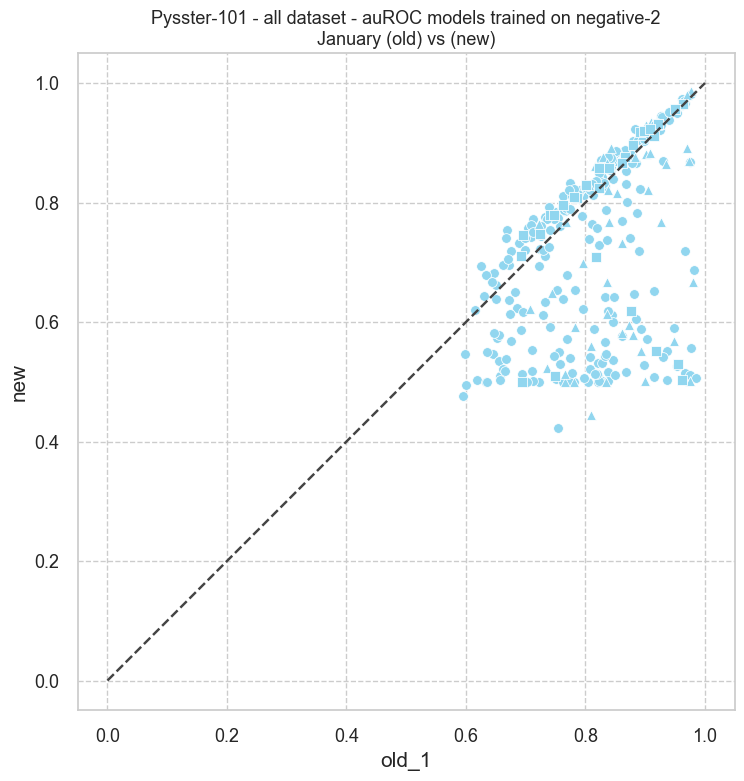

In [127]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(1, 1, 1)


for DATASET in auroc_comp['dataset'].unique():
    print(DATASET)
    sns.scatterplot(
        data=auroc_comp.loc[lambda df: df['dataset']==DATASET,:],
        x="old_1",
        y="new",
        #color=DATASETS_COLORS[DATASET],
        # Color per architecture:
        color=arch_colors[METHOD],
        #color=[DATASET],
        # Change the shape:
        marker=DATASETS_dotshape[DATASET],
        #shape=DATASETS_dotshape[DATASET],
        ax=ax1,
    )
ax1.set_xlim(-0.05, 1.05)
ax1.set_ylim(-0.05, 1.05)
ax1.plot([0.0, 1], [0, 1], color="#444444", linestyle="--")

ax1.set_title(
    f"{METHOD} - all dataset - auROC models trained on {NEGATIVE_SET}\nJanuary (old) vs (new)"
)
ax1.set_aspect("equal")

plt.tight_layout()

plt.show()


## Plot for reviews

In [11]:
def create_regular_grid_axes(N_tot, N_cols, height_row, width):
    """ Create a figure with a grid of N_tot axes with N_cols.
    
    Given N_tot a number of axes to generate, and N_cols the maximum
    number of axes on a row, this function generates the list of axes
    with the correct layout.
    
    To define the size of the figure, height_row and width are used.
    
    In:
        N_tot (int):
        N_cols (int):
        height_row (int):
        width (int):
        
    Return:
        (fig, axs)
        
    """
    N_rows = N_tot // N_cols
    N_rows += N_tot % N_cols
    Position = range(1, N_tot+1)
    
    fig = plt.figure(figsize = (width, height_row * N_rows))
    axs = []
    for pos in Position:
        axs.append(fig.add_subplot(N_rows, N_cols, pos))
        
    return (fig, axs)

In [12]:
may_summary_table['arch'].unique()

array(['BERT-RBP', 'DeepCLIP', 'DeepRAM', 'GraphProt', 'iDeepS',
       'PRISMNet', 'Pysster'], dtype=object)

In [13]:
methods = ['BERT-RBP','DeepCLIP','DeepRAM','GraphProt','iDeepS','PRISMNet','Pysster']

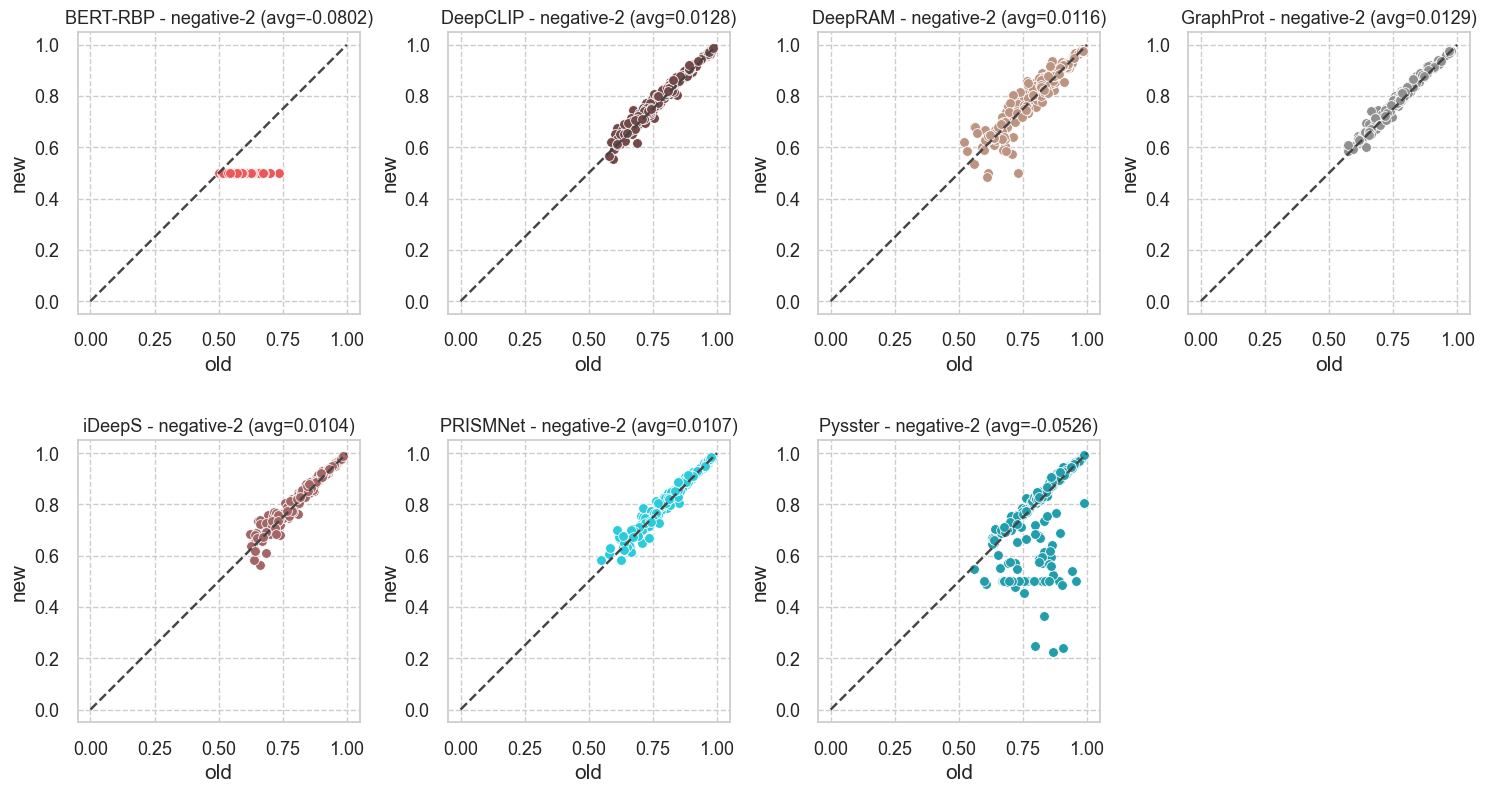

In [16]:
fig, axs = create_regular_grid_axes(
    N_tot=len(may_summary_table["arch"].unique()), N_cols=4, height_row=4, width=15
)


for ax, METHOD in zip(axs, methods):
    tmp_1 = january_old_summary_table.loc[
        lambda df: (df["arch"] == METHOD)
        & (df["dataset"] == "ENCODE")
        & (df["model_negativeset"] == NEGATIVE_SET),
        :,
    ]

    tmp_2 = january_new_summary_table.loc[
        lambda df: (df["arch"] == METHOD)
        & (df["dataset"] == DATASET)
        & (df["model_negativeset"] == NEGATIVE_SET),
        :,
    ]

    tmp_3 = may_summary_table.loc[
        lambda df: (df["arch"] == METHOD)
        & (df["dataset"] == DATASET)
        & (df["model_negativeset"] == NEGATIVE_SET),
        :,
    ]

    auroc_comp = pd.concat(
        [
            tmp_1.set_index("RBP_dataset")["auroc"].rename("old"),
            tmp_2.set_index("RBP_dataset")["auroc"].rename("old_1"),
            tmp_3.set_index("RBP_dataset")["auroc"].rename("new"),
        ],
        axis=1,
    )

    sns.scatterplot(
        data=auroc_comp,
        x="old",
        y="new",
        color=arch_colors[METHOD],
        ax=ax,
    )
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.plot([0.0, 1], [0, 1], color="#444444", linestyle="--")

    avg_delta = (auroc_comp["new"] - auroc_comp["old"]).mean()

    ax.set_title(f"{METHOD} - {NEGATIVE_SET} (avg={avg_delta:.3})")
    ax.set_aspect("equal")

plt.tight_layout()

plt.show()


# OLD

In [3]:
columns = ['model','dataset','RBP_dataset','fold','model_negativeset','sample','prediction','true_class']

archs = ["DeepRAM","Pysster","PRISMNet"]

loaded_archs_res = {}

for arch in archs:
    print(arch)
    path = Path("../datasets/2023-05-24_benchmark_results/main/results.{ARCH}.csv.gz".format(ARCH=arch))
    if not path.exists():
        print(f"\t{arch} not found.")
        continue
    d = pd.read_csv(path,
                    names=columns)

    loaded_archs_res[arch] = d

DeepRAM
Pysster
PRISMNet


In [6]:

parsed_results_archs = {}

unique_id = 0

for arch in loaded_archs_res:
    print(arch)
    
    d = loaded_archs_res[arch]
    
    results_arch = []
    for group, group_df in d.groupby(['dataset','RBP_dataset','fold','model_negativeset']):
        
        meta_info = dict(zip(['dataset','RBP_dataset','fold','model_negativeset'], group))
        
        try:
            df = parse_df(group_df, meta_info = meta_info)

            # Add in a unique ID.
            # This corresponds to a unique combination (dataset, rbp_dataset, fold, model_negativeset, sample_negativeset)
            df.meta['unique_id'] = unique_id

            unique_id +=1
        
            results_arch.append(df)
        except Exception as e:
            print("\t"+";".join([f"{k}:{v}" for k, v in meta_info.items()]))
            print(e)
            continue
        
    parsed_results_archs[arch] = results_arch

DeepRAM
Pysster
PRISMNet


In [7]:

auroc_table = []

for arch in parsed_results_archs.keys():
    r_arch = pd.DataFrame([pd.Series({**{'auroc':get_auroc(ann_df.df),'arch':arch},**ann_df.meta}) 
                         for ann_df in parsed_results_archs[arch] 
                          ])
                         #if ann_df.meta['model_negativeset']==MODEL_NEGATIVESET])
    auroc_table.append(r_arch)

auroc_table = pd.concat(auroc_table)


summarized_table = []
for arch in parsed_results_archs.keys():
    r_arch = pd.DataFrame([pd.Series({**ann_df.meta, **summarize_preds(ann_df.df).to_dict()}) 
                           for ann_df in parsed_results_archs[arch] ])
                         #if ann_df.meta['model_negativeset']==MODEL_NEGATIVESET])
    
    summarized_table.append(r_arch)
    
summarized_table = pd.concat(summarized_table)

In [8]:

if not (auroc_table['unique_id'] == summarized_table['unique_id']).all():
    raise ValueError("The tables should be in sync.")

full_summarized_table = pd.concat([auroc_table, summarized_table.iloc[:,6:]], axis=1)

# Plots

## First

In [50]:
parsed_results_archs['Pysster'][0].meta

{'dataset': 'ENCODE',
 'RBP_dataset': 'AARS_K562',
 'fold': 0,
 'model_negativeset': 'negative-1',
 'sample_negset': 'negative-1',
 'unique_id': 302}

In [58]:
full_summarized_table.loc[
                :].T

,504,505
auroc,0.990742,0.986678
arch,Pysster,Pysster
dataset,Mukherjee-PAR-CLIP,Mukherjee-PAR-CLIP
RBP_dataset,MBNL1_HEK293_PARCLIP,MBNL1_HEK293_PARCLIP
fold,0,0
model_negativeset,negative-1,negative-2
sample_negset,negative-1,negative-2
unique_id,806,807
cts,4280.0,4280.0
pred.min,0.000001,0.00012


In [39]:
i = 0

tmp = full_summarized_table.loc[
    lambda df: (
        df["arch"].isin(
            [
                "Pysster",
            ]
        )
    )
    & (df["auroc"] > 0.99),
    :,
]


for v in tmp.apply(
    lambda row: f"{row['dataset']}/{row['RBP_dataset']}/fold-0/{row['model_negativeset']}/",
    axis=1,
):
    print(v)
    i += 1

print(i)

ENCODE/HNRNPK_HepG2/fold-0/negative-1/
ENCODE/PCBP2_HepG2/fold-0/negative-1/
ENCODE/TARDBP_K562/fold-0/negative-1/
ENCODE/TARDBP_K562/fold-0/negative-2/
Mukherjee-PAR-CLIP/L1RE1_HEK293_PARCLIP/fold-0/negative-1/
Mukherjee-PAR-CLIP/MBNL1_HEK293_PARCLIP/fold-0/negative-1/
Mukherjee-PAR-CLIP/ORF1_HEK293_PARCLIP/fold-0/negative-1/
7


In [15]:
full_summarized_table.loc[
    lambda df: (df['arch'].isin(['DeepRAM','Pysster',])) & \
                (df['auroc']<0.5),
                :].iloc[:,:8]

.to_csv("./poor_perf.tsv", header=True, index=False, sep="\t")

<AxesSubplot:xlabel='arch', ylabel='auroc'>

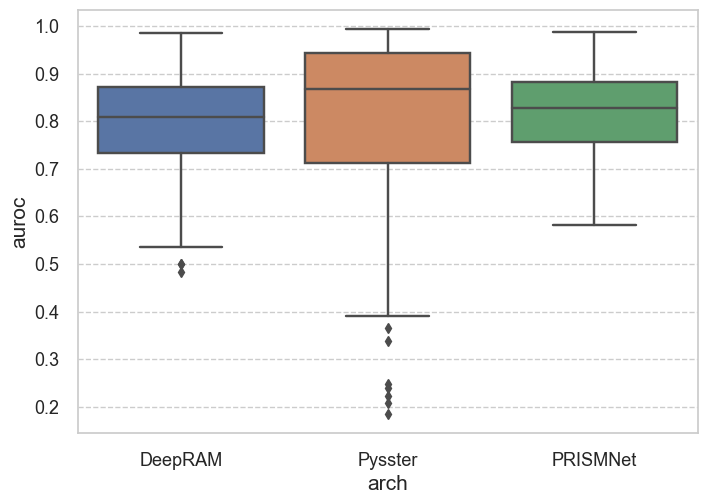

In [11]:
sns.boxplot(
    data=full_summarized_table.loc[lambda df: df['dataset']=='ENCODE',:],
    x='arch',
    y='auroc',
)


## DIA

In [9]:

params_plot = {
    'violinplot':{
        'cut':0.1,
        'bw':0.2,
        'split':True,
    },
    'stripplot':{
        'jitter':True,
        'alpha':0.10,
    },
    'boxplot':{
        
    }
}

fun_plot = {
    'boxplot':sns.boxplot,
    'stripplot':sns.stripplot,
    'boxenplot':sns.boxenplot,
    'violinplot':sns.violinplot,
}
SELECTED_FUNPLOT = 'violinplot'


# Difference in performance PRISMNet Negative 2 NEW vs OLD

In [60]:
df_old = pd.read_csv("../datasets/2023-01-01_benchmark_processed_data/2023-01-27_FullTableAurocFiltered.tsv", header=0, sep="\t")

In [62]:
df_old.head(3)

,auroc,arch,dataset,RBP_dataset,fold,model_negativeset,sample_negset,unique_id,cts,pred.min,...,pc_min.pos,pc_max.neg,pc_max.pos,pc_avg.neg,pc_avg.pos,cm.tn,cm.fp,cm.fn,cm.tp,cm.thresh
0,0.816722,GraphProt,ENCODE,AARS_K562,0,negative-1,negative-1,0,1164.0,-2.32555,...,-2.16176,2.44432,2.78082,-0.622877,0.534087,0.396048,0.103952,0.143471,0.356529,-0.044395
1,0.720094,GraphProt,ENCODE,AARS_K562,0,negative-2,negative-2,1,1164.0,-2.23113,...,-2.10945,1.77512,2.20583,-0.386235,0.215910,0.343643,0.156357,0.174399,0.325601,-0.085162
2,0.869781,GraphProt,ENCODE,AATF_K562,0,negative-1,negative-1,2,1954.0,-2.76148,...,-1.88693,2.18149,3.00107,-0.761631,0.885812,0.417605,0.082395,0.134084,0.365916,0.062090


In [79]:
tmp_1 = df_old.loc[
    lambda df: (df['arch']=='DeepRAM') & \
            (df['dataset']=='ENCODE') & \
            (df['model_negativeset']=='negative-2'),
:]

In [80]:
tmp_2 = full_summarized_table.loc[
    lambda df: (df['arch']=='DeepRAM') & \
            (df['dataset']=='ENCODE') & \
            (df['model_negativeset']=='negative-2'),
:]

In [82]:
auroc_diff_deepram = pd.concat([
                            tmp_1.set_index('RBP_dataset')['auroc'].rename('old'),
                            tmp_2.set_index('RBP_dataset')['auroc'].rename('new')
                        ], axis=1)

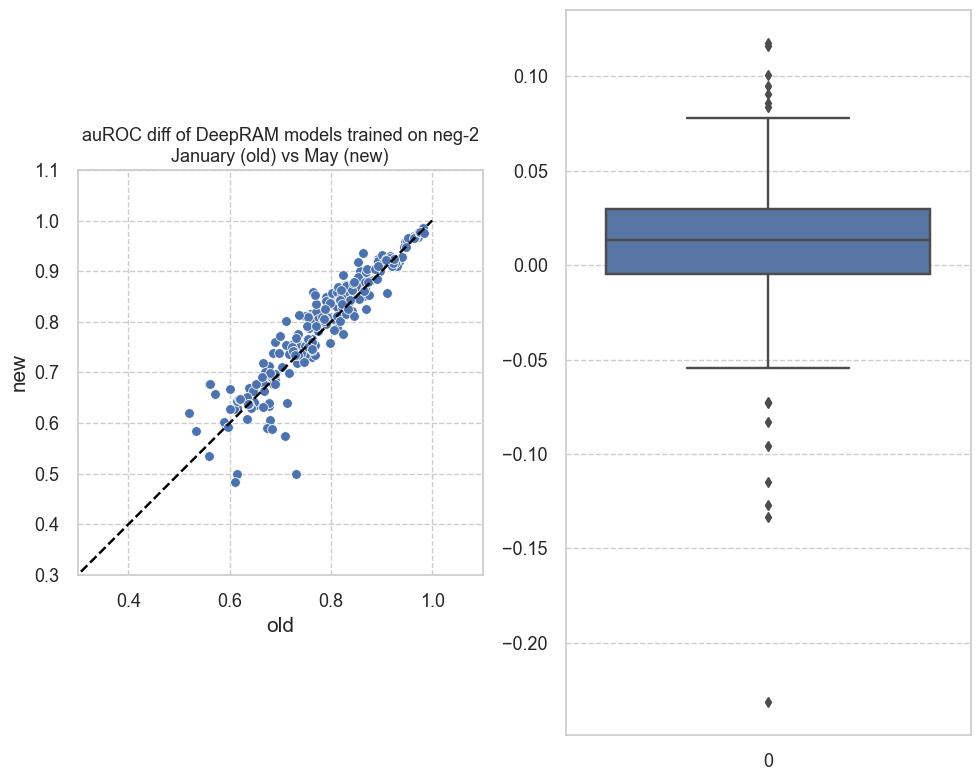

In [83]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)

sns.scatterplot(
    data=auroc_diff_deepram,
    x='old',
    y='new',
    ax=ax1,
)
ax1.set_xlim(0.3,1.1)
ax1.set_ylim(0.3,1.1)
ax1.plot([0.,1], [0,1], color='black', linestyle='--')

ax1.set_title("auROC diff of DeepRAM models trained on neg-2\nJanuary (old) vs May (new)")
ax1.set_aspect("equal")

ax2 = fig.add_subplot(1,2,2)

sns.boxplot(
    data=auroc_diff_deepram['new']-auroc_diff_deepram['old'],
    ax=ax2
)


plt.tight_layout()

plt.show()